## Basic with Titanic - https://www.kaggle.com/daehungwak/guide-kor-dg

### train.csv 

- 예측 모델을 만들기 위해 사용하는 학습셋입니다. 

- 각 탑승객의 신상정보와 ground truth(생존유무)가 주어지며, 신상정보 및 파생변수를 토대로 생존유무를 예측하는 모델을 만듭니다.

### test.csv 

- 학습셋으로 만든 모델을 가지고 예측할 탑승객 정보가 담긴 테스트셋입니다.

---

### Features

- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)

- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)

- sex - 성별

- Age - 나이(세)

- sibsp - 함께 탑승한 형제자매, 배우자 수 총합

- parch - 함께 탑승한 부모, 자녀 수 총합

- ticket - 티켓 넘버

- fare - 탑승 요금

- cabin - 객실 넘버

- embarked - 탑승 항구


## 데이터 분석에 필요한 라이브러리 Import

In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

#ignore warnings
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline


### DATA LOAD - Pandas사용 및 shape, head 및 columns methods

In [88]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [89]:
# train, test 데이터 shape
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [90]:
'''
column(feature)는 총 12개로 이루어져 있으며,
학습에 사용해야 할 feature는 11개,
예측해야 할 feature는 Survived입니다
'''

columns=df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.

- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)

- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)

- sex - 성별

- Age - 나이(세)

- sibsp - 함께 탑승한 형제자매, 배우자 수 총합

- parch - 함께 탑승한 부모, 자녀 수 총합

- ticket - 티켓 넘버

- fare - 탑승 요금

- cabin - 객실 넘버

- embarked - 탑승 항구

### dtypes과 describe사용

In [93]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
 df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 1-1 Null check

### Count가 다른 feature 존재  -> Null값 존재  -> 확인해보자 (isnull, sum)
### Age, Cabin feature에 Null값 존재

- train set과 test set에 비슷하게 Age 피쳐에 약 20%, Cabin 피쳐에 약 80%의 결측치 존재

In [96]:
df_train.isnull().sum() / df_train.shape[0]
#df_train.isnull().sum() / len(df_train)


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [97]:
df_test.isnull().sum() / df_test.shape[0]
#df_test.isnull().sum() / len(df_test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

# 1-2  Target Label, Survived 확인¶
- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서,
- 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다

In [98]:
df_train['Survived'].value_counts()


# f, ax = plt.subplots(1, 2, figsize=(18, 8))

# df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# ax[0].set_title('Pie plot - Survived')
# ax[0].set_ylabel('')
# sns.countplot('Survived', data=df_train, ax=ax[1])
# ax[1].set_title('Count plot - Survived')

# plt.show()

0    549
1    342
Name: Survived, dtype: int64

In [99]:
'''
target label 의 분포가 제법 균일(balanced)합니다.
불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는
만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다.
0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다.
지금 문제에서는 그렇지 않으니 계속 진행하겠습니다
'''

'\ntarget label 의 분포가 제법 균일(balanced)합니다.\n불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는\n만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다.\n0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다.\n지금 문제에서는 그렇지 않으니 계속 진행하겠습니다\n'

# 2 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

## 2.1 Pcalss

먼저 Pclass 에 대해서 살펴보겠습니다.

Pclass는 서수형 데이터입니다.

즉, 카테고리이면서 순서가 있는 데이터 타입입니다.

먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다.

엑셀의 피벗 차트와 유사한 작업을 하게 되는데,

pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다.

또한 pivot 이라는 메소드도 있습니다.

Pclass,Survived 를 가져온 후, pclass 로 묶습니다.

그러고 나면 각 pclass 마다 0, 1 이 count가 되는데,

이를 평균내면 각 pclass 별 생존률이 나옵니다

아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지

확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)

사람의 총합을 주게 됩니다

In [100]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [101]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()


,Survived
Pclass,
1,136
2,87
3,119


In [102]:
# 위와 같은 작업을 crosstab으로 편하게 할 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [103]:
# mean은 생존률을 구하게 할 수 있습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


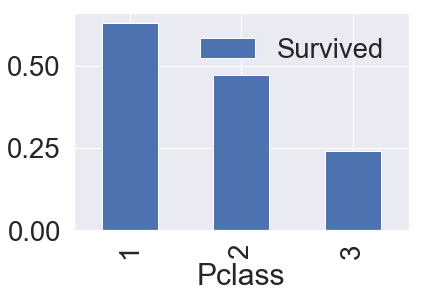

In [104]:
# 이를 시각화 해보았습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며,

나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있습니다.


## 2.2 sex

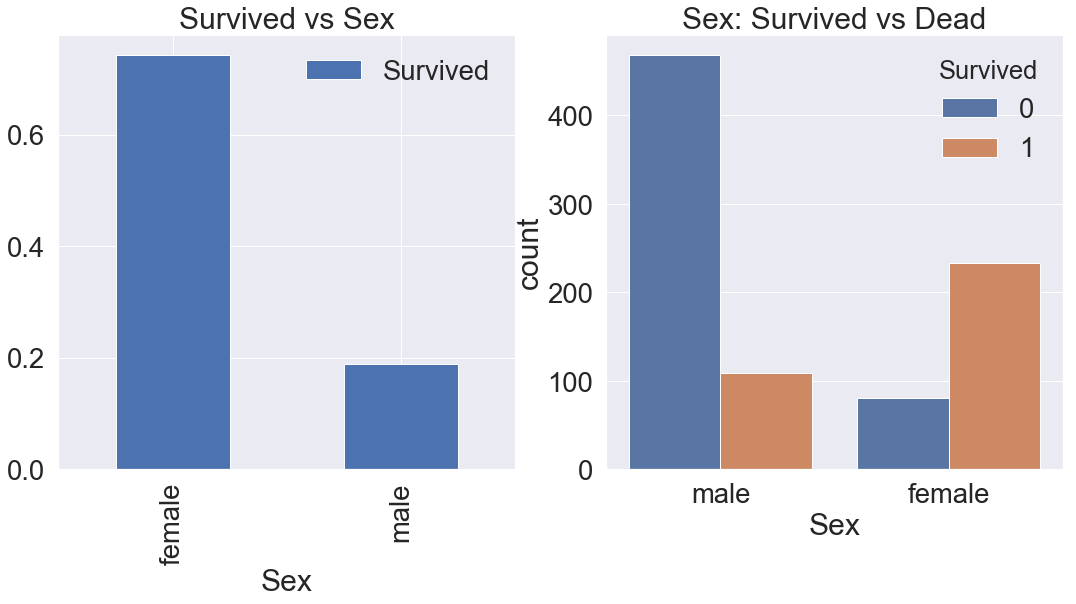

In [105]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


보시다시피, 여자가 생존할 확률이 높습니다.

Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있습니다

## 2.3 Both Sex and Pclass

이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다





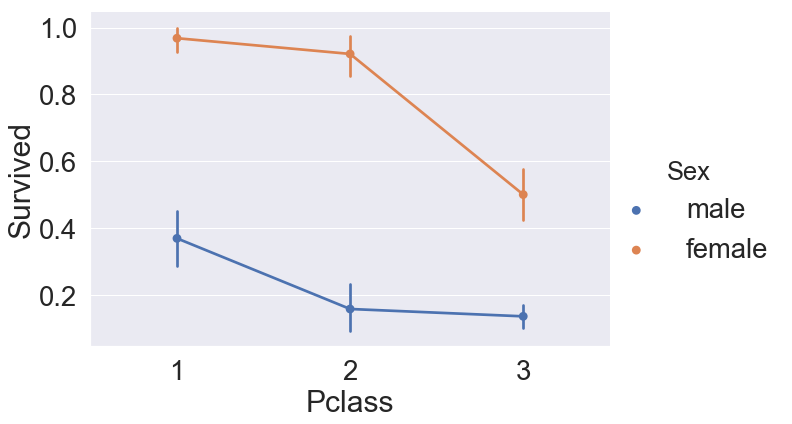

In [106]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.

## 2.4 Age

In [107]:
print('Oldest : {:.1f} Years'.format(df_train['Age'].max()))
print('Youngest : {:.1f} Years'.format(df_train['Age'].min()))
print('Average : {:.1f} Years'.format(df_train['Age'].mean()))


Oldest : 80.0 Years
Youngest : 0.4 Years
Average : 29.7 Years


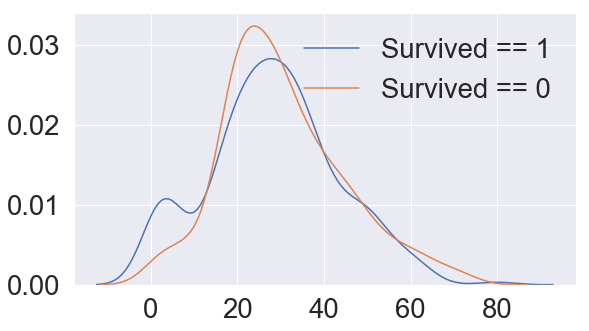

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

해당 히스토그램을 보시면 어린 나이(약 15세 미만) 구간에서

생존률이 상대적으로 높음을 확인할 수 있습니다

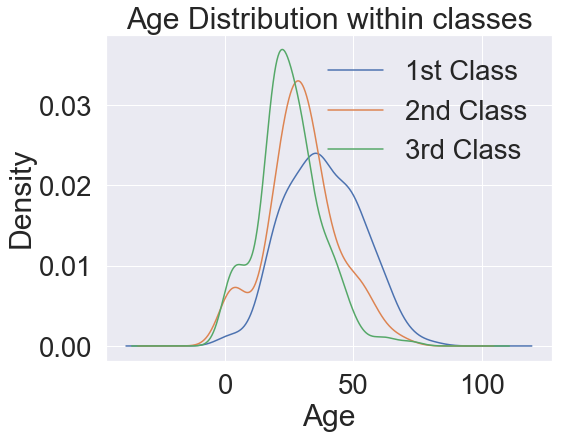

In [109]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

위의 그래프 클래스가 높아질 수록, 나이 연령대가 높아짐을 확인할 수 있습니다.

나이대가 높아질 수록 생존확률이 어떻게 달라지는지 알고 싶어져,

누적 확률을 활용한 시각화를 해보았습니다.



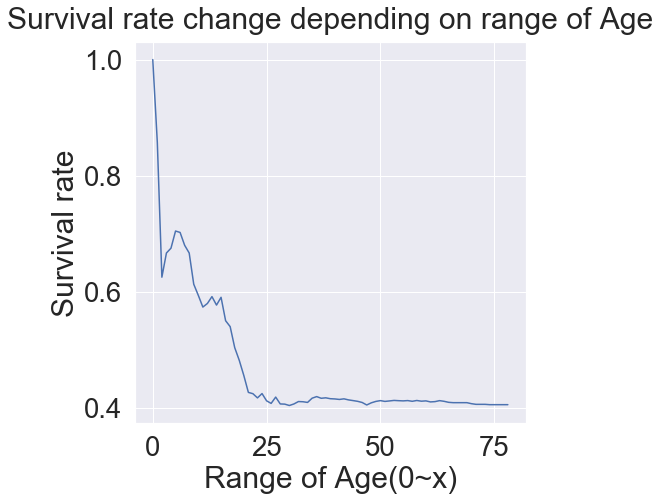

In [110]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

나이가 어릴 수록 생존률이 확실히 높은것을 확인할 수 있습니다.

이를 통해 나이도 중요한 피쳐임을 확인할 수 있습니다.

지금까지 얻은 분석을 종합하자면,

- 여자이거나

- 나이가 어리고,

- 클래스가 높을 수록

생존확률이 높음을 확인할 수 있습니다.

## 2.5 Embarked

Embarked는 탑승한 항구를 나타냅니다.



In [111]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

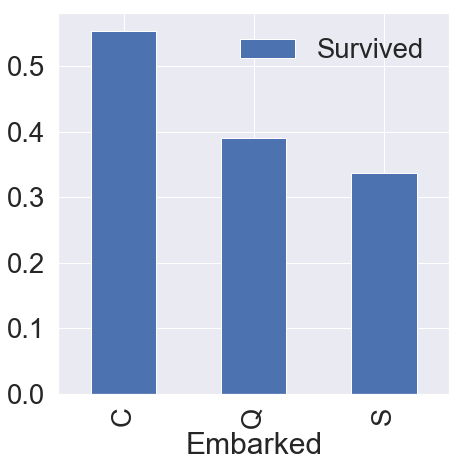

In [112]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

탑승한 곳에 따라 생존률의 차이가 많이 보이지는 않지만,

그래도 차이가 있으니 피쳐로 사용해보겠습니다.

그럼 다른 피쳐와의 상관관계도 한번 알아보도록 하겠습니다.

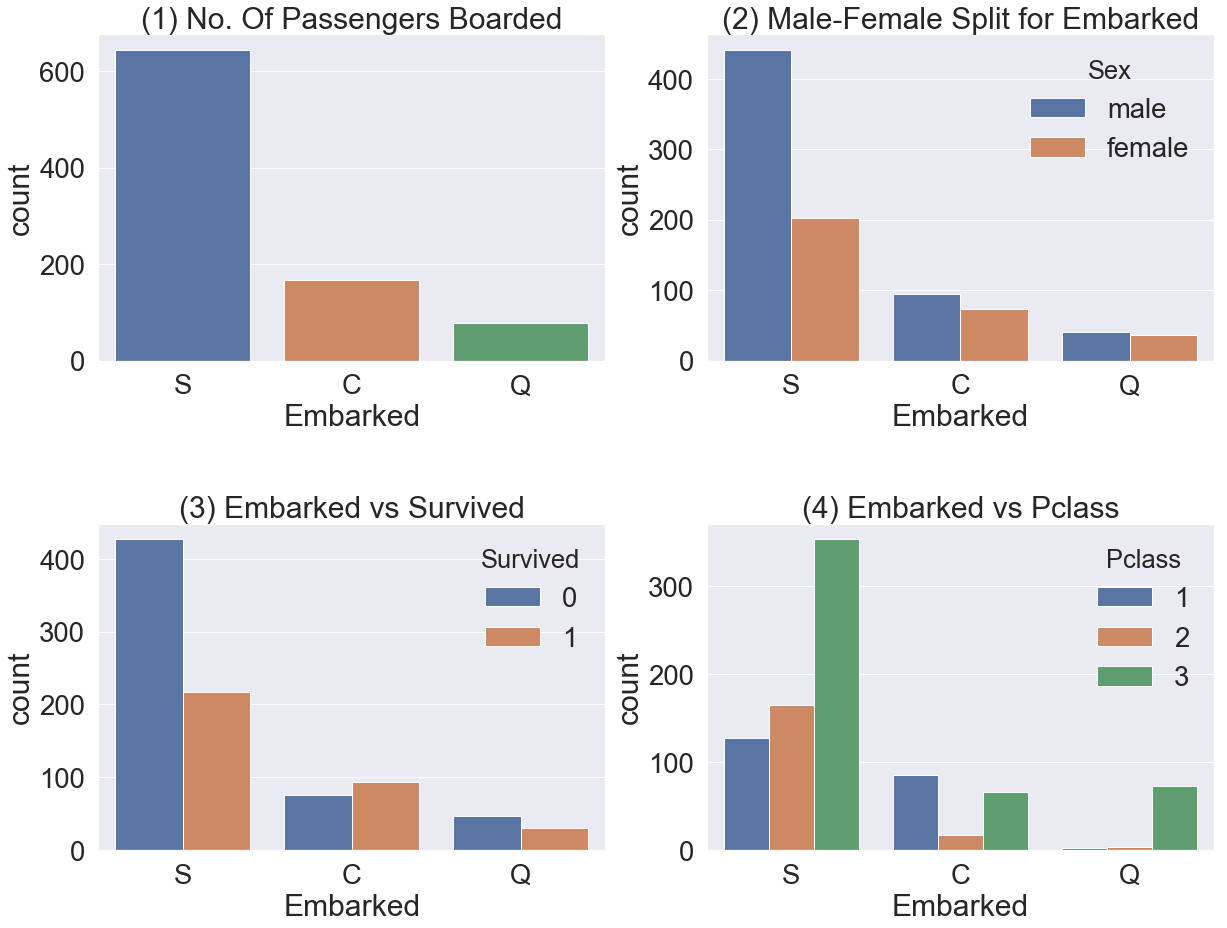

In [113]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.

- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.

- Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)

- Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

## 2.6 Family - SibSp(형제 자매) + Parch(부모, 자녀)

SibSp와 Parch를 합치면 함께 탑승한 가족의 수가 될 것입니다.

이 두 피쳐를 더해서 새로운 피쳐 FamilySize를 만들어 보도록 하겠습니다.

(사실 새로운 피쳐를 만들어 내는 건 Feature Engneering쪽에서 다뤄야 하지만 일단 미리 보겠습니다.)

In [114]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다


In [115]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())


Maximum size of Family:  11
Minimum size of Family:  1


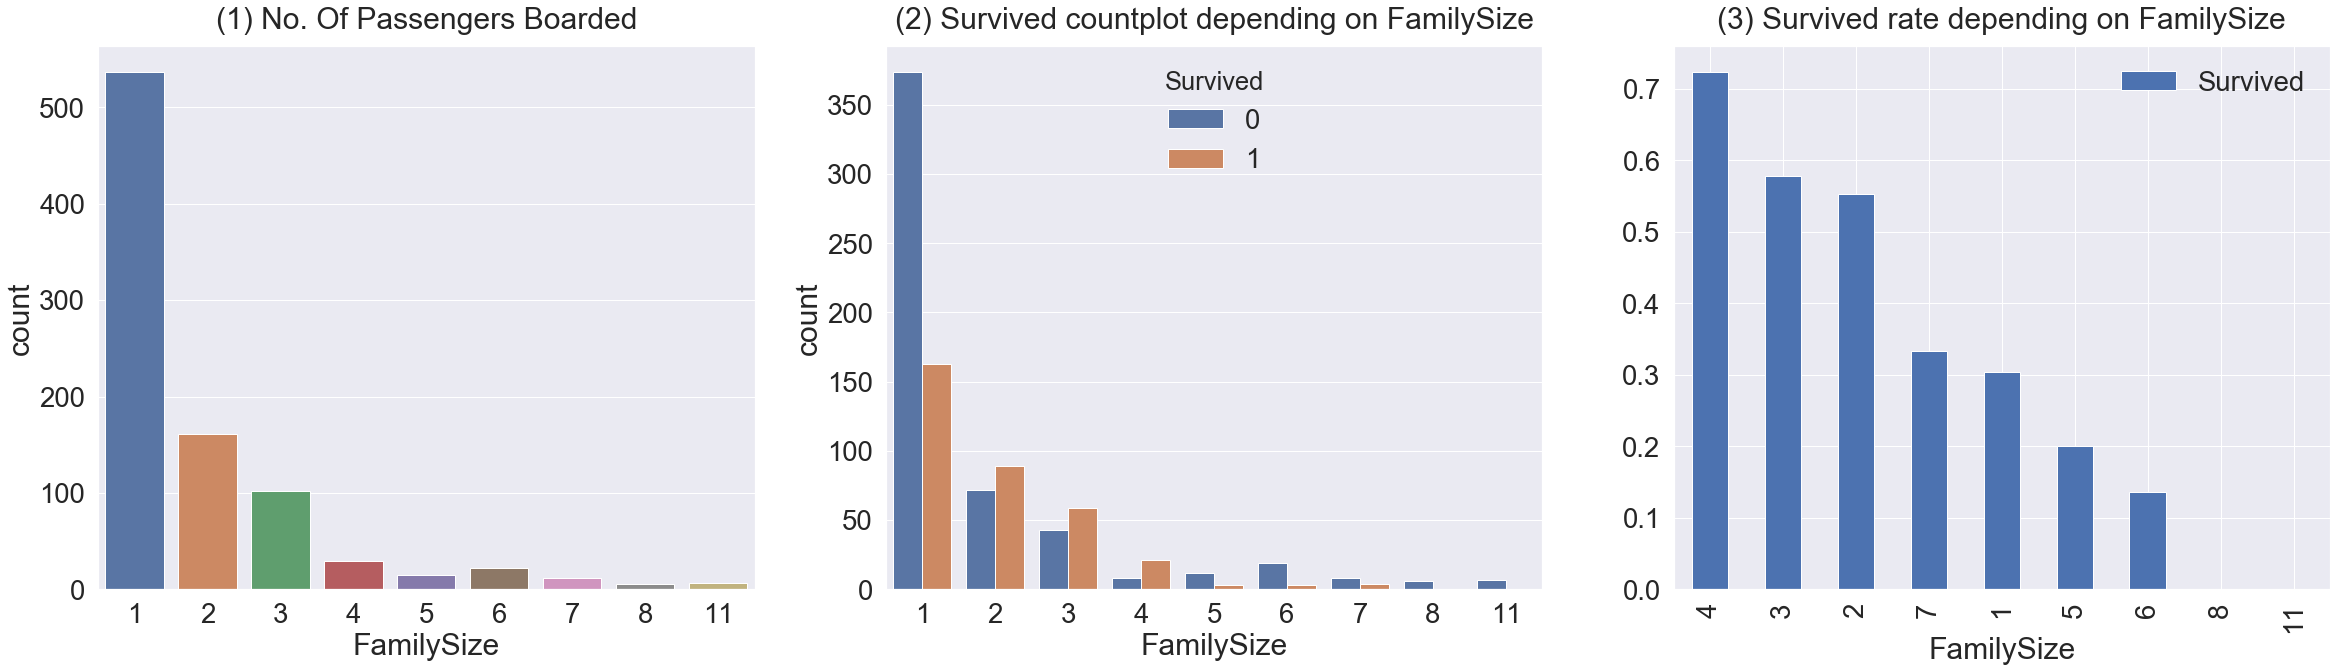

In [116]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.

- Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다,

  가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요.
  
  가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.


## 2.7 Fare

해당 피쳐는 탑승 요금입니다. 연속적인 데이터이므로 한번 histogram을 그려보도록 하겠습니다

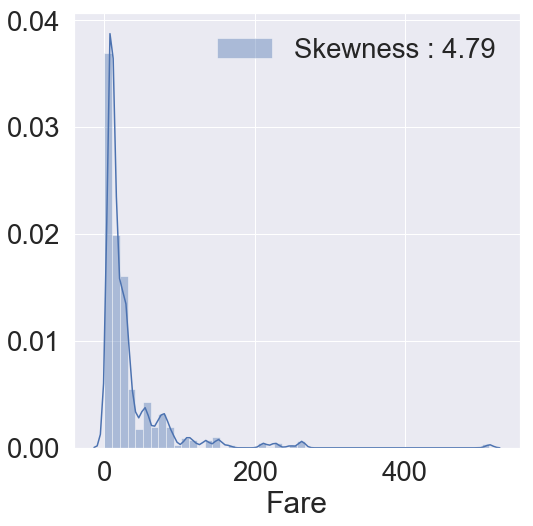

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [118]:
df_test.isnull().sum() / df_test.shape[0]
#df_test.isnull().sum() / len(df_test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
FamilySize     0.000000
dtype: float64

In [119]:
# 특이하기도 train set 말고 test set에 Fare 피쳐에 널 값이 하나 존재하는 것을 확인할 수 있었습니다.
# 그래서 평균 값으로 해당 널값을 넣어줍니다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

In [120]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

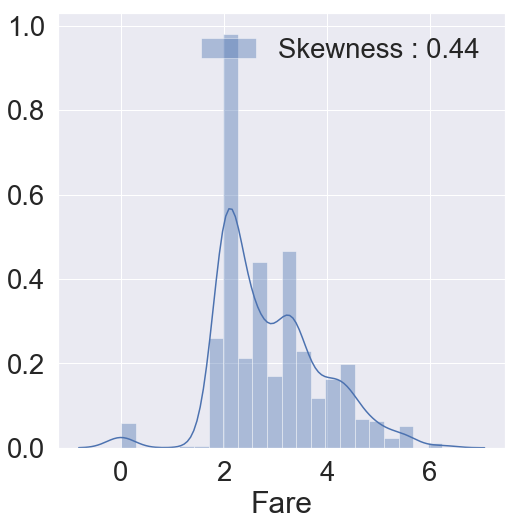

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.

우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.

사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.

모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나,

새로운 feature를 추가하는 것을 feature engineering 이라고 하는데,

우리는 다음 챕터에 그것을 살펴볼 것입니다.

## 2.8 Cabin

이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.

그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.



In [122]:
### Cabin 피쳐의 Null 비율 계산
df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [123]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


## 2.9 Ticket

이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야

실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [124]:
df_train['Ticket'].value_counts()

1601                  7
CA. 2343              7
347082                7
347088                6
CA 2144               6
3101295               6
S.O.C. 14879          5
382652                5
2666                  4
17421                 4
113781                4
19950                 4
113760                4
4133                  4
W./C. 6608            4
349909                4
347077                4
LINE                  4
PC 17757              4
C.A. 34651            3
SC/Paris 2123         3
239853                3
PC 17760              3
C.A. 31921            3
29106                 3
24160                 3
230080                3
PC 17755              3
347742                3
110413                3
                     ..
17764                 1
349208                1
65303                 1
211536                1
7540                  1
349247                1
11771                 1
345780                1
7598                  1
383121                1
330932          

보시다시피, ticket number 는 매우 다양합니다.

우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?

한번 생각을 해보시고 새로운 Feature를 만들어 모델의 성능을 끌어올리는 것도

재밌는 데이터 분석 과정 중 하나니 힘내서 생각하시고 즐겨보시길 바랍니다!!


## 3.1 Fill Null
## 3.1.1 Fill Null in Age using title¶

In [125]:
df_train["Age"].isnull().sum()

177

Age 에는 null data가 177개나 있습니다. 이를 채울 수 있는 여러 아이디어가 있을 것인데,

여기서 우리는 title + statistics 를 사용해 보겠습니다.

영어에서는 Miss, Mrr, Mrs 같은 title이 존재합니다.

각 탑승객의 이름에는 꼭 이런 title 이 들어가게 되는데 이를 사용해보겠습니다.

pandas series 에는 data 를 string 으로 바꿔주는 str method,

거기에 정규표현식을 적용하게 해주는 extract method가 있습니다.

이를 사용하여 title 을 쉽게 추출할 수 있습니다. title을 Initial column에 저장하겠습니다

In [126]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations


pandas 의 crosstab 을 이용하여 우리가 추출한 Initial 과 Sex 간의 count 를 살펴봅시다.

혹시나 잘 못 이름이 적혀져 있거나 성별을 잘 못 분류 했을 수도 있으니깐요?

In [127]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [128]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [129]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


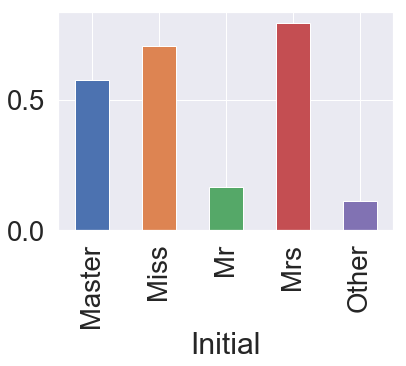

In [130]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

이제 본격적으로 Null 을 채울 것입니다. null data 를 채우는 방법은 정말 많이 존재합니다.

statistics 를 활용하는 방법도 있고, null data 가 없는 데이터를

기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다.

(딥러닝에서 디노이징 오토인코더 라는 것이 있습니다!)

여기서는 statistics 를 활용하는 방법을 사용할 것입니다.

여기서 statistics 는 train data 의 것을 의미합니다.

우리는 언제나 test 를 unseen 으로 둔 상태로 놔둬야 하며,

train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 합니다.

In [131]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


저희는 각 initial 그룹별 Age 평균 값을 사용해서 채워 넣도록 하겠습니다.

In [132]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [133]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [134]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

## 3.1.2 Fill Null in Embarked

In [135]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로,

간단하게 Null 을 S로 채우겠습니다.

dataframe 의 fillna method 를 이용하면 쉽게 채울 수 있습니다.

여기서 inplace=True 로 하면 df_train 에 fillna 를 실제로 적용하게 됩니다.

In [136]:
df_train['Embarked'].fillna('S', inplace=True)

In [137]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

## 3.2. Change Age(continuous to categorical)

Age 는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만,

Age 를 몇개의 group 으로 나누어 category 화 시켜줄 수 도 있습니다.

continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있습니다만,

본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.

방법은 여러가지가 있습니다.

dataframe 의 indexing 방법인 loc 를 사용하여 직접해줄 수 있고,

아니면 apply 를 사용해 함수를 넣어줄 수 있습니다.

loc 예제는 위의 age mean 값을 채워 줬을 때 사용해 봤으므로,

여기에선 apply를 사용해 보도록 하겠습니다.

In [138]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [139]:
df_train.groupby(['Age_cat'])['PassengerId'].count()


Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

이제 파생 피쳐를 만들었으므로 원래 컬럼 Age 를 제거하는게 맞겠지만,

저희는 상관 관계가 높아도 모델의 설명력(성능)에 도움이 될 수 있으니

남겨 보도록 하겠습니다.

## 3.3 Change Initial, Embarked and Sex (string to numerical)

현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다.

이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때

우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.

map method 를 가지고 간단히 할 수 있습니다.

사전 순서대로 정리하여 mapping 하겠습니다



In [140]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

마찬가지 Embarked와 Sex 피쳐도 string이라 같은 과정을 거치겠습니다.

In [141]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [142]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(False, dtype('int64'))

Null이 없고, int형으로 잘 바뀐 것으로 보아 잘 변환 되었음을 확인할 수 있습니다.
마찬가지 sex에도 적용합니다.

In [143]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})


여지껏 고생하셨습니다!! 엄청 많은걸 하셨어요!!

이제 각 feature 간의 상관관계를 한번 보려고 합니다.

두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다.

- -1로 갈수록 음의 상관관계,

- 1로 갈수록 양의 상관관계를 의미하며

- 0은 상관관계가 없다는 것을 의미합니다.

따로 수식은 적지 않도록 하겠습니다. 검색만 하셔도 수식은 많이 나오니

궁금하시면 공부해보시걸 추천합니다!

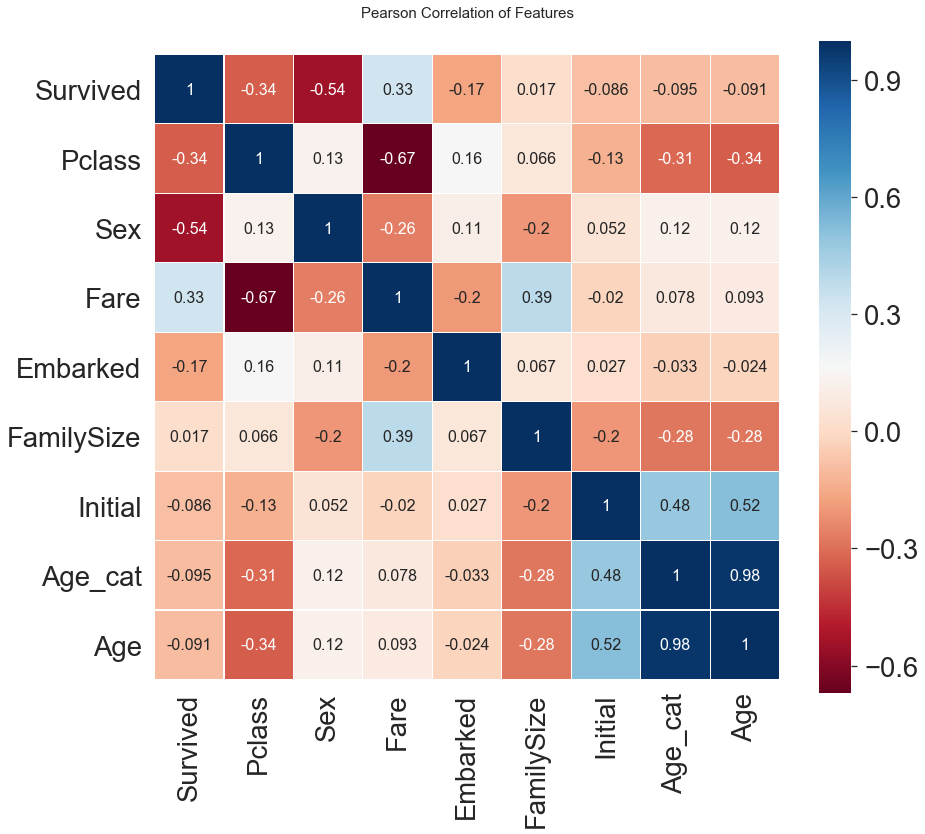

In [144]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

우리가 EDA에서 살펴봤듯이,

Sex 와 Pclass 가 Survived 에 상관관계가 어느 정도 있음을 볼 수 있습니다.

생각보다 fare 와 Embarked 도 상관관계가 있음을 볼 수 있습니다.

또한 우리가 여기서 얻을 수 있는 정보는

서로 강한 상관관계를 가지는 feature들이 없다는 것입니다.

(Age와 Age_cat 제외..)

이것은 우리가 모델을 학습시킬 때, 불필요한 feature 가 없다는 것을 의미합니다.

1 또는 -1 의 상관관계를 가진 feature A, B 가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 거니까요.

이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보겠습니다.

거의 다 와갑니다 힙냅시다!

## 3.4 One-hot encoding on Initial and Embarked

수치화시킨 카테고리 데이터를 그대로 넣어도 되지만,

모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.

수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말합니다.

One-hot encoding 은 위 카테고리를 아래와 같이 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말합니다.



<img src='one_hot.png'>

In [145]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')


In [146]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


Embarked 에도 적용하겠습니다. Initial 때와 마찬가지로 one-hot encoding 을 사용해 표현하겠습니다.

In [147]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')


##  3.5 Drop columns

마지막으로 필요없는 피쳐를 없애버릴 차례입니다!

In [148]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [149]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [150]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [151]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


In [152]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

보시다시피, train 의 Survived feature(target class)를 빼면

train, test 둘다 같은 columns 를 가진 걸 확인할 수 있습니다.

## 4. 모델 개발 및 학습

지금 타이타닉 문제는 target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary)

binary classfication 문제입니다.

우리가 지금 가지고 있는 train set 의 survived를 제외한 input 을 가지고

모델을 최적화시켜서 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어 냅니다.

그 후 모델이 학습하지 않았던 test set 을 input 으로 주어서 test set 의 각 샘플(탑승객)의 생존 유무를 예측해봅니다.

In [153]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

## 4.1 Preparation - Split dataset into train, valid(dev), test set

가장 먼저, 학습에 쓰일 데이터와, target label(Survived)를 분리합니다.

drop 을 사용해 간단히 할 수 있습니다.

In [154]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [155]:
X_train.shape, X_test.shape

((891, 14), (418, 14))

In [156]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)
y_tr.shape, y_vld.shape

((712,), (179,))

## 4.2 Model generation and prediction

이제 logistic regression


In [164]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [165]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * accuracy_score(y_vld,prediction)))

총 179명 중 87.15% 정확도로 생존을 맞춤


In [166]:
from sklearn.metrics import *

In [167]:
confusion_matrix(y_vld,prediction)

array([[109,   6],
       [ 17,  47]], dtype=int64)

In [168]:
f1_score(y_vld,prediction)    

0.8034188034188035

In [169]:
print(classification_report(y_vld,prediction))

             precision    recall  f1-score   support

          0       0.87      0.95      0.90       115
          1       0.89      0.73      0.80        64

avg / total       0.87      0.87      0.87       179



In [170]:
prob1 = model.predict_proba(X_vld)[:,1]
for i in range(40, 60):
    predict = [1 if p >i/100 else 0 for p in prob1]
    print("Cutoff : ", i/100, "  F1-Score : ", f1_score(y_vld, predict))

Cutoff :  0.4   F1-Score :  0.787878787878788
Cutoff :  0.41   F1-Score :  0.8062015503875969
Cutoff :  0.42   F1-Score :  0.8031496062992126
Cutoff :  0.43   F1-Score :  0.7936507936507936
Cutoff :  0.44   F1-Score :  0.8064516129032259
Cutoff :  0.45   F1-Score :  0.7967479674796748
Cutoff :  0.46   F1-Score :  0.7967479674796748
Cutoff :  0.47   F1-Score :  0.8032786885245901
Cutoff :  0.48   F1-Score :  0.7966101694915254
Cutoff :  0.49   F1-Score :  0.8034188034188035
Cutoff :  0.5   F1-Score :  0.8034188034188035
Cutoff :  0.51   F1-Score :  0.8034188034188035
Cutoff :  0.52   F1-Score :  0.8034188034188035
Cutoff :  0.53   F1-Score :  0.8034188034188035
Cutoff :  0.54   F1-Score :  0.7826086956521738
Cutoff :  0.55   F1-Score :  0.7826086956521738
Cutoff :  0.56   F1-Score :  0.7719298245614036
Cutoff :  0.57   F1-Score :  0.7678571428571428
Cutoff :  0.58   F1-Score :  0.7678571428571428
Cutoff :  0.59   F1-Score :  0.7636363636363634


In [174]:
prob0 = model.predict_proba(X_vld)[:,0]
for i in range(40, 60):
    predict = [0 if p >i/100 else 1 for p in prob0]
    print("Cutoff : ", i/100, "  F1-Score : ", f1_score(y_vld, predict))

Cutoff :  0.4   F1-Score :  0.7636363636363634
Cutoff :  0.41   F1-Score :  0.7636363636363634
Cutoff :  0.42   F1-Score :  0.7678571428571428
Cutoff :  0.43   F1-Score :  0.7678571428571428
Cutoff :  0.44   F1-Score :  0.7719298245614036
Cutoff :  0.45   F1-Score :  0.7826086956521738
Cutoff :  0.46   F1-Score :  0.7826086956521738
Cutoff :  0.47   F1-Score :  0.8034188034188035
Cutoff :  0.48   F1-Score :  0.8034188034188035
Cutoff :  0.49   F1-Score :  0.8034188034188035
Cutoff :  0.5   F1-Score :  0.8034188034188035
Cutoff :  0.51   F1-Score :  0.8034188034188035
Cutoff :  0.52   F1-Score :  0.7966101694915254
Cutoff :  0.53   F1-Score :  0.8032786885245901
Cutoff :  0.54   F1-Score :  0.7967479674796748
Cutoff :  0.55   F1-Score :  0.7967479674796748
Cutoff :  0.56   F1-Score :  0.8064516129032259
Cutoff :  0.57   F1-Score :  0.7936507936507936
Cutoff :  0.58   F1-Score :  0.8031496062992126
Cutoff :  0.59   F1-Score :  0.8062015503875969


In [181]:
fpr, tpr, thresholds = roc_curve(y_vld, model.predict_proba(X_vld)[:,1])
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.00869565 0.00869565 0.00869565 0.00869565
 0.02608696 0.02608696 0.03478261 0.03478261 0.04347826 0.04347826
 0.05217391 0.05217391 0.06086957 0.06086957 0.07826087 0.07826087
 0.08695652 0.08695652 0.10434783 0.10434783 0.16521739 0.16521739
 0.2173913  0.23478261 0.23478261 0.29565217 0.29565217 0.34782609
 0.34782609 0.40869565 0.40869565 0.46086957 0.46086957 0.50434783
 0.50434783 0.56521739 0.57391304 0.6        0.6173913  0.66086957
 0.66956522 0.73913043 0.75652174 0.8        0.8        0.8173913
 0.8173913  0.85217391 0.86956522 0.92173913 0.93913043 1.        ]
[0.015625 0.25     0.25     0.5      0.546875 0.59375  0.59375  0.640625
 0.640625 0.65625  0.65625  0.671875 0.671875 0.734375 0.734375 0.75
 0.75     0.765625 0.765625 0.78125  0.78125  0.8125   0.8125   0.828125
 0.828125 0.828125 0.84375  0.84375  0.859375 0.859375 0.875    0.875
 0.890625 0.890625 0.90625  0.90625  0.921875 0.921875 0.9375   0.9375
 0.9375   0.9375   0.953125 0.953125 0.95

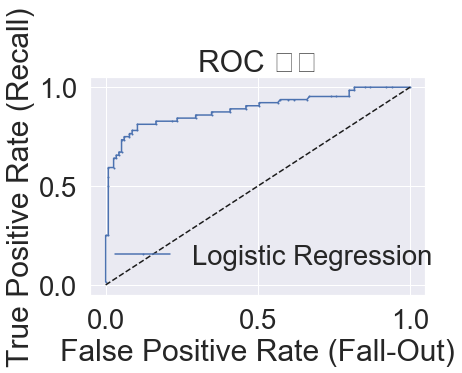

In [182]:
plt.plot(fpr, tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC 커브')
plt.show()

In [183]:
auc(fpr, tpr)

0.8896739130434782